## A notebook for EFTflag = 2, the alternative parametrization case for EFT

### Here we just show how to set the parameters of this flag, the details of description please see them in 01_pureEFT exapmle and the markdown file in find_your_model file.

In [2]:
# initial imports:
import sys, platform, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

camb_installation_path = './../' 
camb_path = os.path.realpath(os.path.join(os.getcwd(),camb_installation_path))
sys.path.insert(0,camb_path)
print('camb path:', camb_path)
import camb
# camb.set_feedback_level(1)
from camb import model, initialpower

camb path: /Users/linshijie/Desktop/research/CodeGithub/EFTCAMB_update/pyEFTCAMB-Public


In [3]:
# Turn off all the stability checks firstly
stability_flag ={
                'feedback_level'             : 0,      
                'EFT_ghost_math_stability'   : False,
                'EFT_mass_math_stability'    : False,
                'EFT_ghost_stability'        : True,
                'EFT_gradient_stability'     : True,
                'EFT_mass_stability'         : False,
                'EFT_additional_priors'      : False,
                }

### CHOOSE EFT MODEL: 
#### EFTflag = 2 -> AltParEFT, using a parametrization that is mapped to the EFT framework
There are four flags under AltParEFT, the flag name is **AltParEFTmodel**.
- AltParEFTmodel = 1: Reparametrized Horndeski
- AltParEFTmodel = 2: Lambda-Omega parametrization with gamma functions
- AltParEFTmodel = 3: Lambda-Omega parametrization with alpha functions
- AltParEFTmodel = 4: Shift Symmetric Gravity with alpha_B

In [4]:
# Still use the GR case to compare
GR_params = {'EFTflag':0
            }

# AltEFT models
AltEFT_params1 = {'EFTflag':2,
                 'AltParEFTmodel':1,
                #  'RPHwDE': 2,'RPHw0': -0.43,'RPHwa': -0.86,
                #  ??????????????????????????????????????????????????????????
                #  'RPHusealphaM': True, 'RPHalphaMmodel': 1, 'RPHalphaM0': -0.2,
                 'RPHmassPmodel': 1, 'RPHmassP0': 0.2,
                 'RPHkineticitymodel': 1, 'RPHkineticity0':1.5,
                 'RPHbraidingmodel': 0, 
                 'RPHtensormodel': 0,     
                 }
AltEFT_params1.update(stability_flag)

AltEFT_params2 = {'EFTflag':2,
                    'AltParEFTmodel':2,
                    'OLLambdamodel': 0, 
                    'OLOmegamodel': 1, 'OLOmega0': 0.3,
                    'OLGamma1model': 1, 'OLGamma10': 0.2,
                    'OLGamma2model': 0, 
                    'OLGamma3model': 0,     
                    }
AltEFT_params2.update(stability_flag)

AltEFT_params3 = {'EFTflag':2,
                    'AltParEFTmodel':3,
                    'OLLambdamodel': 0,
                    'OLmassPmodel': 1, 'OLmass0': 0.2,
                    'OLkineticitymodel': 1, 'OLkineticity0':1, 
                    'OLbraidingmodel': 0, 
                    'OLtensormodel': 0,        
                    }
AltEFT_params3.update(stability_flag)

AltEFT_params4 = {'EFTflag':2,
                    'AltParEFTmodel':4,
                    # 'EFTwDE': 2, 'EFTw0': -0.43,'EFTwa': -0.86,
                    'Shift_Symmetric_alphaB0': 0.6,
                    'Shift_Symmetric_m': 1.2,
                    'Shift_Symmetric_alphaK0':1.5
                    }
AltEFT_params4.update(stability_flag)

In [5]:
model_key = ['GR', 'RPH', 'OLGamma', 'OLalpha','SS'] 
model_par = [GR_params, AltEFT_params1, AltEFT_params2, AltEFT_params3, AltEFT_params4]
Model = dict(zip(model_key,model_par))    # dictionary with the models, be careful for differring from camb.model

#### See how many extra parameters you have, and how they are called and their values:

In [6]:
pars =camb.set_params(H0=67.3, **Model['SS']) # set the parameters
print(pars.EFTCAMB.param_names())
print(pars.EFTCAMB.param_labels())
print(pars.EFTCAMB.param_values())

['alpha_B0', 'm', 'alpha_K0']
['alpha_B0', 'm', 'alpha_K0']
[0.6, 1.2, 1.5]


In [7]:
pars = []
for key in Model:
    print('Model:', key)
    pars.append(camb.set_params(H0=67.3, **Model[key]))
    # pars_num = pars.EFTCAMB.param_names()
    # pars_label = pars.EFTCAMB.param_labels()
    # pars_value = pars.EFTCAMB.param_values()
    # print('Model:', key)

Model: GR
Model: RPH
Model: OLGamma
Model: OLalpha
Model: SS


# Move to get some results

#### First, let's see some background functions

In [8]:
for key in Model:
    print('Model:', key)
    pars = camb.set_params(H0=67.3, **Model[key])
    bk_results = camb.get_background(pars)
    print('The age of the universe for {}: '.format(key), bk_results.get_derived_params()['age'])
    print('CosmoMC theta_MC parameter for {}:'.format(key), bk_results.cosmomc_theta(), '\n')

Model: GR
The age of the universe for GR:  13.812291011516189
CosmoMC theta_MC parameter for GR: 0.01041714773853369 

Model: RPH
The age of the universe for RPH:  13.812282425270224
CosmoMC theta_MC parameter for RPH: 0.010417146271383855 

Model: OLGamma
The age of the universe for OLGamma:  12.273696184003713
CosmoMC theta_MC parameter for OLGamma: 0.01161899799763845 

Model: OLalpha
The age of the universe for OLalpha:  12.634354421036718
CosmoMC theta_MC parameter for OLalpha: 0.011314054749181773 

Model: SS
The age of the universe for SS:  13.812291011516189
CosmoMC theta_MC parameter for SS: 0.01041714773853369 



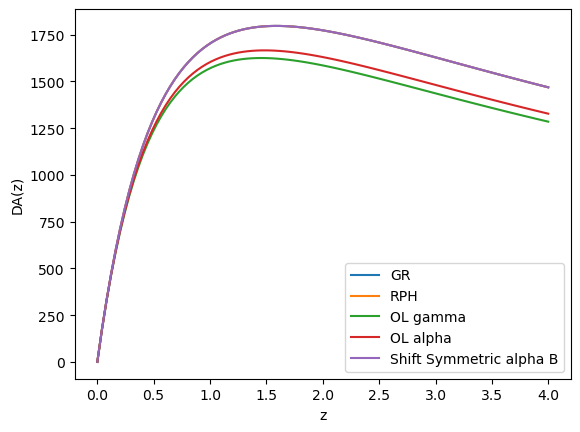

In [9]:
z = np.linspace(0,4,100)
labs = []
for key in Model:
# We set here camb default param values (Planck 2018 cosmology) through the CAMBparams() method     
# The cosmological model can be changed with CAMB dedicated function
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    if key == 'GR':
        labs.append('GR')
    else:
        labs.append(pars.EFTCAMB.model_name()) # store the model names for the model passed to set_cosmology
    DA =results.angular_diameter_distance(z)  # the angular diameter distance
    plt.plot(z,DA,label=key)
plt.xlabel('z')
plt.ylabel('DA(z)')
plt.legend(labs)
plt.show()

#### Second, give the CMB Cls.

In [10]:
toplot_totCL = []
for key in Model:
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    Cls =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    
    totCL=Cls['total']
    # unlensedCL=Cls['unlensed_scalar']
    toplot_totCL.append(totCL)
    

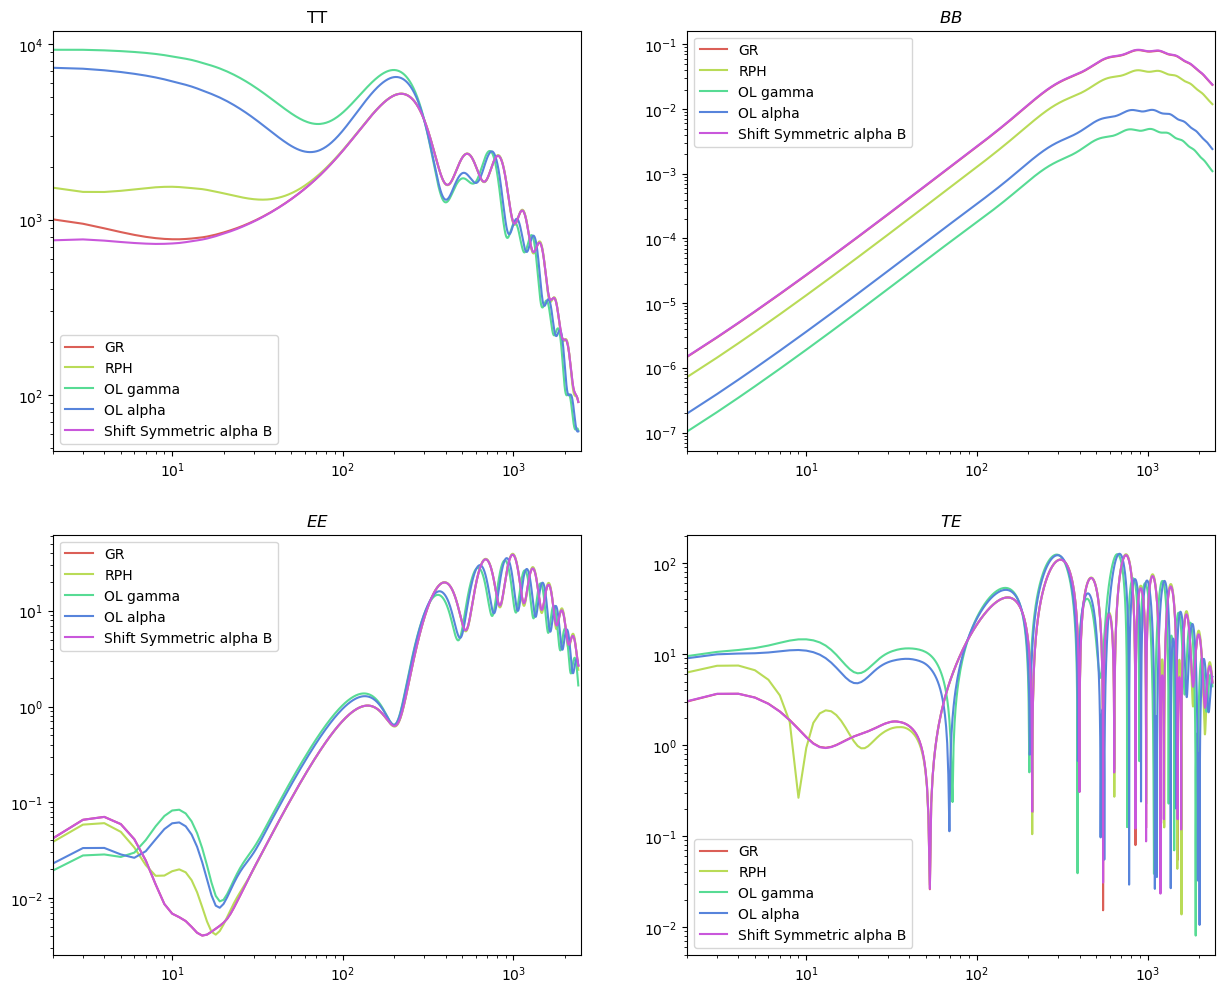

In [11]:
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results)

fig, ax = plt.subplots(2,2, figsize = (15,12))
color = sns.hls_palette(len(Model))

for CLS,c,lab in zip(toplot_totCL,color,labs):
    
    ls = np.arange(CLS.shape[0])
    ax[0,0].loglog(ls,CLS[:,0], color=c,label=lab)
    ax[0,1].loglog(ls,CLS[:,2], color=c,label=lab)
    ax[1,0].loglog(ls,CLS[:,1], color=c,label=lab)
    ax[1,1].loglog(ls,abs(CLS[:,3]), color=c,label=lab)
    ax[0,0].set_title('TT')
    ax[0,1].set_title(r'$BB$')
    ax[1,0].set_title(r'$EE$')
    ax[1,1].set_title(r'$TE$');

ax[1,0].legend()
ax[0,0].legend()
ax[0,1].legend()
ax[1,1].legend()

for ax in ax.reshape(-1): ax.set_xlim([2,2500]);

#### Third, let's see the power spectrum.
Now, non-linear is not the case for the EFT theory.

In [12]:
toplot_matter_kh = []
toplot_matter_pk = []

for key in Model:
    pars = camb.set_params(H0=67.3, **Model[key])
    pars.set_matter_power(redshifts=[0.], kmax=2.0)
    pars.NonLinear = model.NonLinear_none         # linear power spectrum
    results = camb.get_results(pars)

    kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200, params = pars) 
  
    toplot_matter_kh.append(kh)
    toplot_matter_pk.append(pk[0])

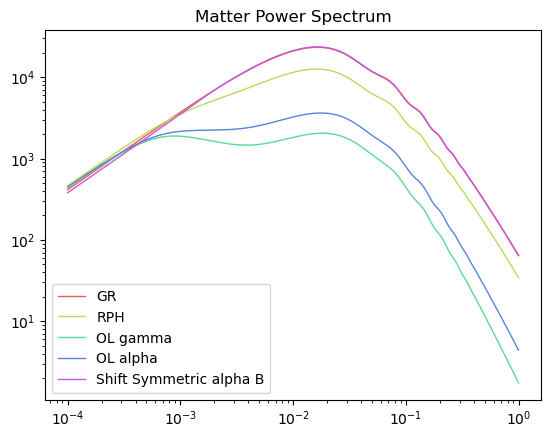

In [13]:
color = sns.hls_palette(len(Model))

for KH, PK, c, key in zip(toplot_matter_kh, toplot_matter_pk, color, labs):
    plt.loglog(KH,PK, color=c,label=key,lw='1.0')
    plt.title(r'Matter Power Spectrum',fontsize=12)

plt.legend(fontsize=10)
plt.show()

#### Besides, you can also get the time/scale evolution of some values by #ModelName#.EFTCAMB.get_scale_evolution() function. 

In [14]:
a_vec = np.logspace(-2,0, num=200)
toplot_phi = []
toplot_mu = []
toplot_sgm = []
for key in Model:
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    nms, vls = pars.EFTCAMB.get_scale_evolution(results, 0.1, a_vec)

    toplot_phi.append(vls['phi_scf'][0])
    toplot_mu.append(vls['mu'][0])
    toplot_sgm.append(vls['sigma_eft'][0])

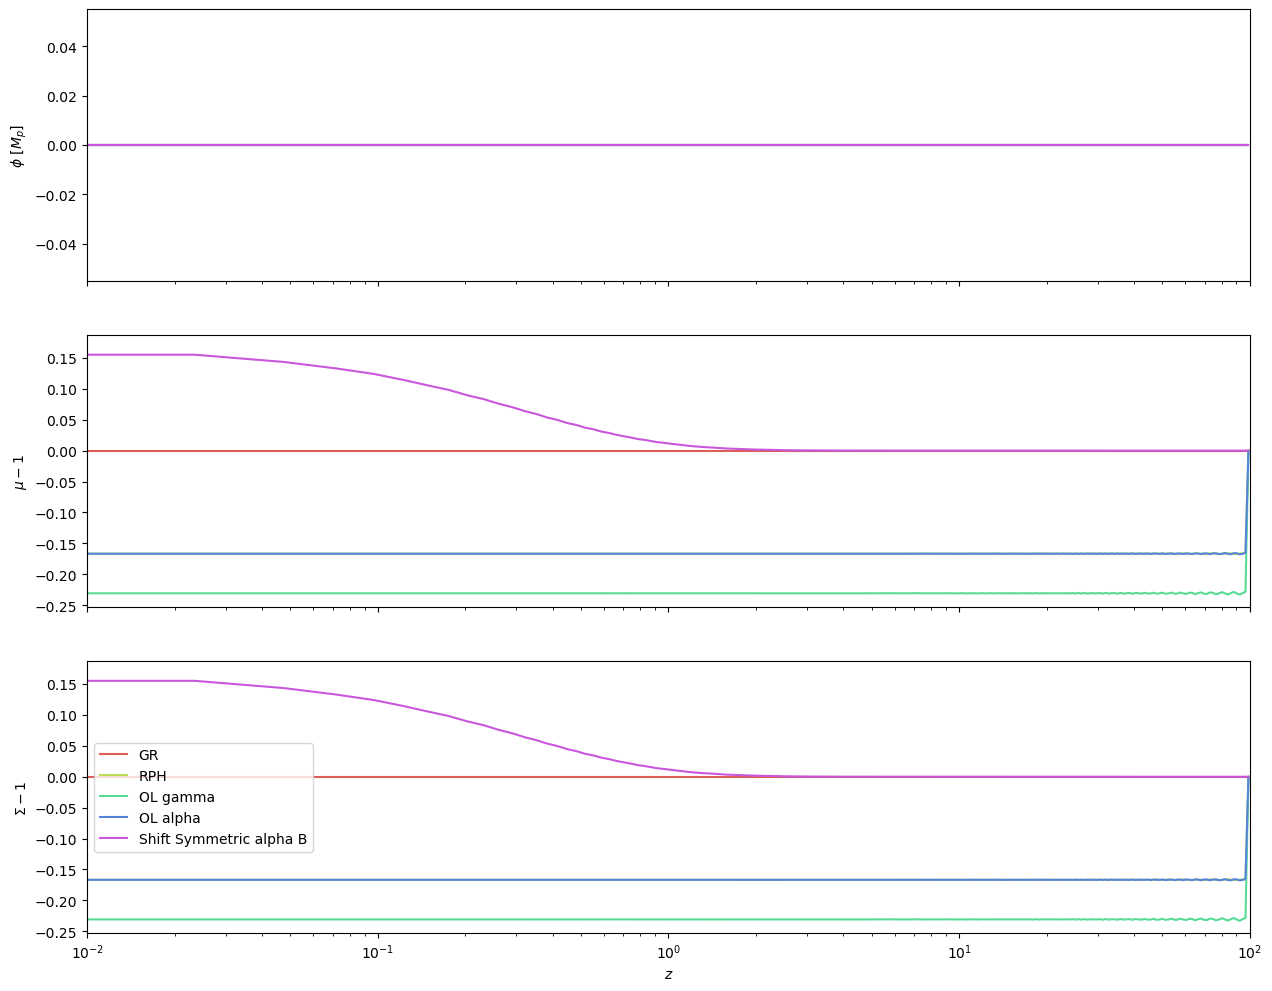

In [15]:
fig, ax = plt.subplots(3,1, figsize = (15,12),sharex=True)
color = sns.hls_palette(len(Model))

for phi, mu, sgm, c, key in zip(toplot_phi, toplot_mu, toplot_sgm, color, labs):
    
    ax[0].plot(1/a_vec-1, phi, color=c,label=key)
    ax[1].plot(1/a_vec-1, mu-1, color=c,label=key)
    ax[2].plot(1/a_vec-1, sgm-1, color=c,label=key)

    ax[0].set_ylabel(r'$\phi \ [M_p]$')
    ax[1].set_ylabel(r'$\mu - 1$')
    ax[2].set_ylabel(r'$\Sigma - 1$')


ax[2].set_xlabel(r'$z$')
ax[2].set_xlim([1e-2,1e2])
ax[2].set_xscale('log')
# ax[2].set_xticks([0.1, 1, 10, 1e3, 3500, 1e5], [0.1, 1, 10, "$10^3$", r"$z_{\rm eq} = 3500$", "$10^5$"])


plt.legend(fontsize=10)
plt.show()